# Grad School Admittance
## Logistic Regression

In [1]:
import numpy as np
from   random import random

import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

from   matplotlib.pyplot import plot
from   matplotlib import pyplot as plt

from   sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv( "admittance_train.csv", skiprows=2 )
df
df.drop( columns=df.columns[0], inplace=True ) # Drop the original index column
print( df.columns.values )
print( "GMAT: Min: %d, Max: %d, Avg: %d" % ( df.gmat.min(), df.gmat.max(), df.gmat.mean() ) )
print( "GPA:  Min: %.1f, Max: %.1f, Avg: %.1f" % ( df.gpa.min(),  df.gpa.max(),  df.gpa.mean() ) )
print( "Work: Min: %.1f, Max: %.1f, Avg: %.1f" % ( df.work_experience.min(), df.work_experience.max(), df.work_experience.mean() ) )

['gmat' 'gpa' 'work_experience' 'admitted']
GMAT: Min: 540, Max: 780, Avg: 650
GPA:  Min: 1.7, Max: 4.0, Avg: 3.1
Work: Min: 1.0, Max: 6.0, Avg: 3.7


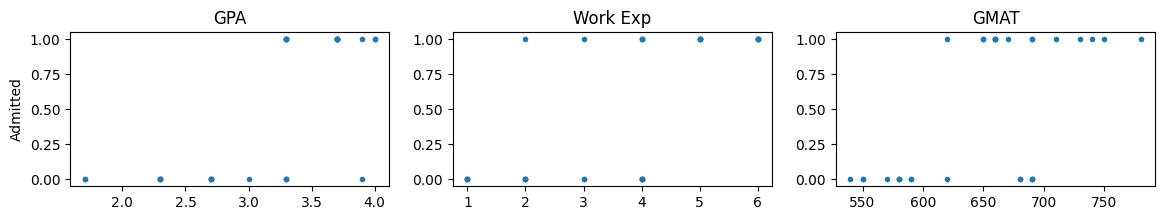

In [3]:

fig, axes = plt.subplots( 1, 3 )

fig.set_figheight( 2 )
fig.set_figwidth(  14 )

gpa  = axes[0]
work = axes[1]
gmat = axes[2]

gpa.set_title( "GPA" )
work.set_title( "Work Exp" )
gmat.set_title( "GMAT" )

axes[0].set_ylabel( "Admitted" )

gpa.plot(  df.gpa,             df.admitted, '.' )
work.plot( df.work_experience, df.admitted, '.' )
gmat.plot( df.gmat,            df.admitted, '.' )

plt.show()

In [4]:
r_gpa_v_admitted  = smf.logit( "admitted ~ gpa", data=df ).fit( disp=0 ) # disp = 0 silences output
r_gmat_v_admitted = smf.logit( "admitted ~ gmat", data=df ).fit( disp=0 )
r_work_v_admitted = smf.logit( "admitted ~ work_experience", data=df ).fit( disp=0 )

r_all_v_admitted  = smf.logit( "admitted ~ gpa + gmat + work_experience", data=df ).fit( disp=0 )

print( "Admit vs GPA:  %.2f%%"   % ( r_gpa_v_admitted.prsquared * 100 ) )
print( "Admit vs GMAT: %.2f%%"   % ( r_gmat_v_admitted.prsquared * 100 ) )
print( "Admit vs Work: %.2f%%\n" % ( r_work_v_admitted.prsquared * 100 ) )
print( "Admit vs All:  %.2f%%" % ( r_all_v_admitted.prsquared * 100 ) )

Admit vs GPA:  52.10%
Admit vs GMAT: 31.48%
Admit vs Work: 42.65%

Admit vs All:  64.32%


## Look at how the training data lines up with the formula created from the training data... 

False Negatives (We predict that this student would not be admitted):
    gmat  gpa  work_experience  admitted  train_predictions
18   620  3.3                2         1           0.138757
False Positives (We predicted that these students would be admitted):
    gmat  gpa  work_experience  admitted  train_predictions
13   680  3.3                4         0           0.579204
14   680  3.9                4         0           0.909863
pre: [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
Prediction accuracy: 0.9


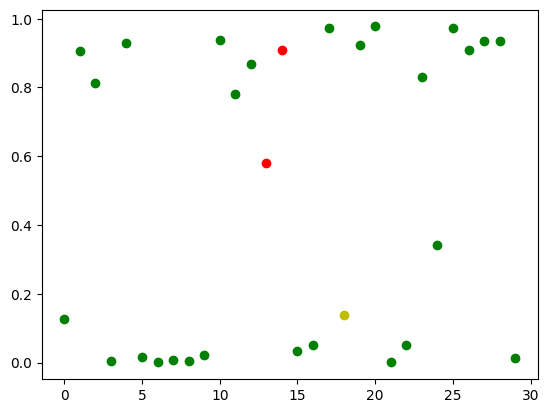

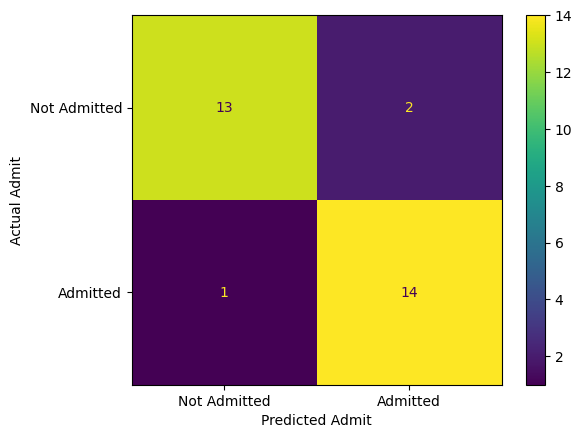

In [5]:
# See how each of our training data points fits into the created formula.

x_train = df[ [ "gmat", "gpa", "work_experience" ] ]
df[ "train_predictions" ] = r_all_v_admitted.predict( x_train )

# Plot predicted admit that were admitted
df_correct = df[ (df.train_predictions >= 0.5) & (df.admitted == 1.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted non-admit that were not admitted
df_correct = df[ (df.train_predictions < 0.5) & (df.admitted == 0.0) ]
plot( df_correct.train_predictions, 'go' )

# Plot predicted admit that were NOT admitted
df_false_pos = df[ (df.train_predictions >= 0.5) & (df.admitted == 0.0) ]
plot( df_false_pos.train_predictions, 'ro' )

# Plot predicted NOT-admit that were admitted
df_false_neg = df[ (df.train_predictions < 0.5) & (df.admitted == 1.0) ]
plot( df_false_neg.train_predictions, 'yo' )

print( "False Negatives (We predict that this student would not be admitted):" )
print( df_false_neg )

print( "False Positives (We predicted that these students would be admitted):" )
print( df_false_pos )

predictions = list( map( round, df.train_predictions.values ) )
print("pre:", predictions)

cm = confusion_matrix( df.admitted, predictions )
disp = ConfusionMatrixDisplay( cm, display_labels=[ "Not Admitted", "Admitted" ] )
axes = disp.plot()
axes.ax_.set( xlabel="Predicted Admit", ylabel="Actual Admit")

print( "Prediction accuracy:", accuracy_score( df.admitted, predictions ) )

## Validate Prediction Formula Using Test Data

Actual Admittance:    [0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
Predicted Admittance: [0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Prediction accuracy: 90.0%


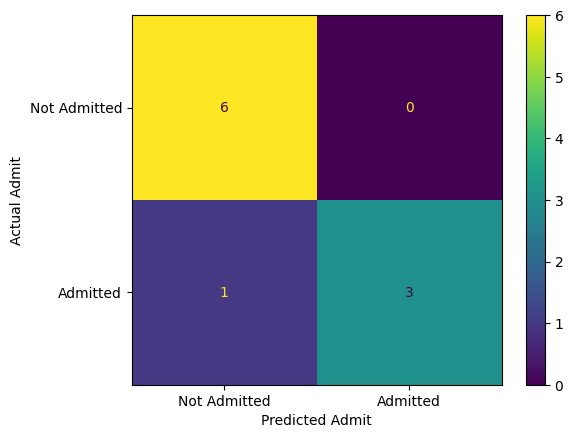

In [6]:
df_test = pd.read_csv( "admittance_test.csv" )
df_test.drop( columns=df_test.columns[0], inplace=True ) # Drop the original index column

x_test = df_test[ [ "gmat", "gpa", "work_experience" ] ]

yhat = r_all_v_admitted.predict( x_test )
testing_predictions = list( map( round, yhat ) ) # Turn 0.0-1.0 percentages into discreet 0 or 1

print( "Actual Admittance:   ", list( df_test.admitted.values ) )
print( "Predicted Admittance:", list( testing_predictions ) )

cm = confusion_matrix( df_test.admitted, testing_predictions )
disp = ConfusionMatrixDisplay( cm, display_labels=[ "Not Admitted", "Admitted" ] )
axes = disp.plot()
axes.ax_.set( xlabel="Predicted Admit", ylabel="Actual Admit")

print( "Prediction accuracy: %.1f%%" % ( accuracy_score( df_test.admitted, testing_predictions ) * 100 ) )

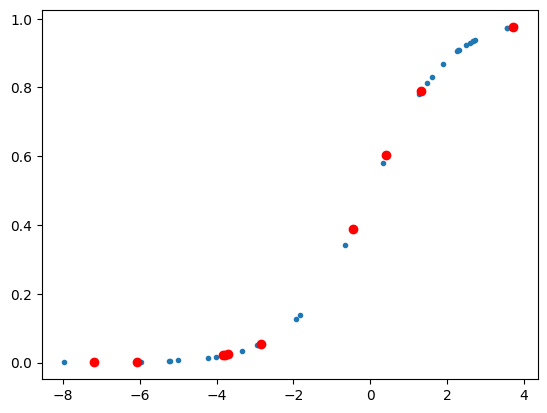

In [7]:
x_train = df[ [ "gmat", "gpa", "work_experience" ] ]
yhat_training = r_all_v_admitted.predict( x_train )

params = dict( r_all_v_admitted.params )

########################################################
# Training Data:

scores = []
for gmat, gpa, work, _, _ in df.values:
    score = params[ "Intercept" ] + gpa * params[ "gpa" ] + gmat * params[ "gmat" ] + work * params[ "work_experience" ]
    scores.append( score )

#plot( scores, testing_predictions, '.' )
plot( scores, yhat_training, '.' )

########################################################
# Testing data:

scores = []
for gmat, gpa, work, _ in df_test.values:
    score = params[ "Intercept" ] + gpa * params[ "gpa" ] + gmat * params[ "gmat" ] + work * params[ "work_experience" ]
    scores.append( score )

plot( scores, yhat, 'ro' )


## Results of (Fabricated) Exact Results

In [9]:
# In this example, we are going to (pretend) that students were admitted based only on
# having a 3.5 or higher GPA.  Note: Noise must be added to make regression converge.

min_gpa = 3.5

def noise( x ):
    mod = (random() - 0.5) / 16.0 # Little noise / uncertainty
    #mod = (random() - 0.5) # Lots of noice and uncertainty
    return ( x + mod ) >= min_gpa

df = pd.read_csv( "admittance-400.csv" )

df["Admitted_On_GPA"] = df.gpa.apply( noise ).astype( float )
print( "# admitted, # denied:", len( df[ df.Admitted_On_GPA == 1.0 ] ), len( df[ df.Admitted_On_GPA == 0.0 ] ) )

print( "Low GPAs Admitted:" )
print( len( df[ (df.Admitted_On_GPA==1.0) & ( df.gpa < min_gpa ) ] ) )
# print( df[ (df.Admitted_On_GPA==1.0) & ( df.gpa < min_gpa ) ] )
print( "High GPAs NOT Admitted:" )
print( len( df[ (df.Admitted_On_GPA==0.0) & ( df.gpa >= min_gpa ) ] ) )
# print( df[ (df.Admitted_On_GPA==0.0) & ( df.gpa >= min_gpa ) ] ) 

# admitted, # denied: 159 241
Low GPAs Admitted:
3
High GPAs NOT Admitted:
4


~r^2: 95.112%


Text(0.5, 1.0, 'Predicted Admittance vs GPA')

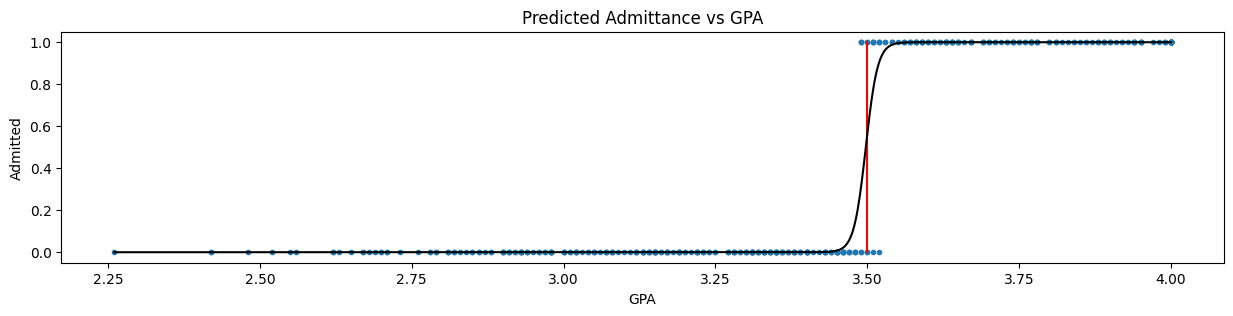

In [10]:
logistic = lambda x: 1 / ( 1 + np.exp(-x) )

odds  = lambda p: p/(1-p)
logit = lambda p: np.log( odds(p) )

r0  = smf.logit( "Admitted_On_GPA ~ gpa", data=df ).fit( disp=0 ) # disp = 0 silences output
print( "~r^2: %.3f%%" % ( r0.prsquared * 100 ) )

plt.figure( figsize=( 15, 3) )
plot( df.gpa, df.Admitted_On_GPA, "." )
plot( [min_gpa,min_gpa], [0,1], 'r')

par = dict( r0.params )
xs = np.linspace( df.gpa.min(), df.gpa.max(), 1000 )
ys = logistic( par['Intercept'] + par['gpa']*xs )
plt.plot( xs, ys, color='Black' ) # Smushed line

plt.xlabel( "GPA" )
plt.ylabel( "Admitted" )
plt.title( "Predicted Admittance vs GPA" )
#plt.xlim( [3.4, 3.6] )

In [11]:
# Size of likelihood depends slope of line...
prob_admit = 0.9
print( "GPA needed (%.0f%% likely): %.2f" % ( prob_admit*100, ( logit(prob_admit) - par['Intercept'] ) /par['gpa'] ) )
prob_admit = 0.75
print( "GPA needed (%.0f%% likely): %.2f" % ( prob_admit*100, ( logit(prob_admit) - par['Intercept'] ) /par['gpa'] ) )
prob_admit = 0.5
print( "GPA needed (%.0f%% likely): %.2f" % ( prob_admit*100, ( logit(prob_admit) - par['Intercept'] ) /par['gpa'] ) )
prob_admit = 0.10
print( "GPA needed (%.0f%% likely): %.2f" % ( prob_admit*100, ( logit(prob_admit) - par['Intercept'] ) /par['gpa'] ) )

GPA needed (90% likely): 3.52
GPA needed (75% likely): 3.51
GPA needed (50% likely): 3.50
GPA needed (10% likely): 3.48


### Regress using both GPA and GRE - NOTE: Only GPA was used to determine admittance

~r^2: 95.122%, p-values: gpa: 0.001, gre: 0.821


(200.0, 850.0)

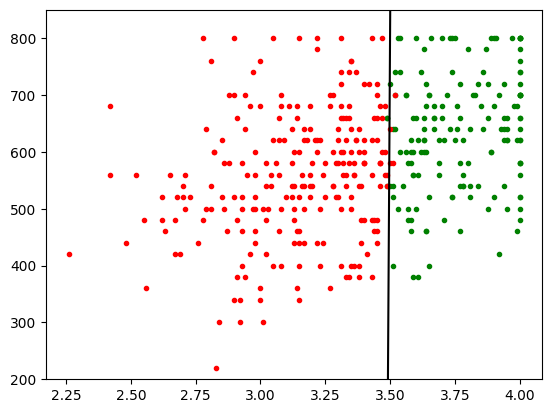

In [12]:
r1  = smf.logit( "Admitted_On_GPA ~ gpa + gre", data=df ).fit( disp=0 ) # disp = 0 silences output

print( "~r^2: %.3f%%, p-values: gpa: %.3f, gre: %.3f" % ( ( r1.prsquared * 100 ), r1.pvalues["gpa"], r1.pvalues["gre"] ) )

admitted     = df[ df.Admitted_On_GPA == 1.0 ]
not_admitted = df[ df.Admitted_On_GPA == 0.0 ]
# print("len:", len( not_admitted ), len( admitted ) )

plot( admitted.gpa, admitted.gre, 'g.' )
plot( not_admitted.gpa, not_admitted.gre, 'r.' )

xs = np.linspace( 3.0, 4.0, 1000 )
par = dict( r1.params )
# solve 0.5 = logistic(b0 + b1*xs + b2*y) for y
# logit(0.5) = b0 + b1*xs + b2*y
# y = (logit(.5) - b0 - b1*x)/b2
plt.plot( xs, (1/par['gre'])*(logit(.5) - par['Intercept'] - par['gpa']*xs), color='Black' )
plt.ylim( [200, 850] )


### Admit using GRE and GPA

58 342


(200.0, 850.0)

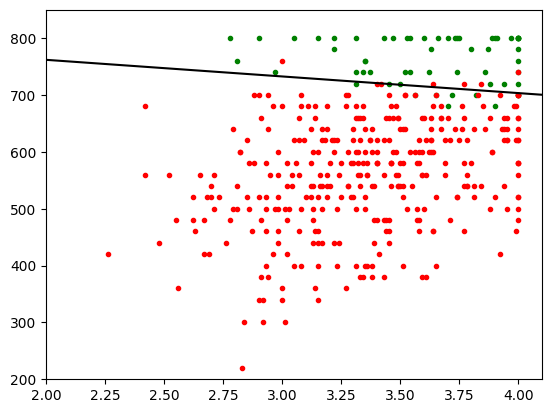

In [13]:
def noise_gpa( x ) :
    return x + ( random() - 0.5 ) / 16

def noise_gre( x ) :
    return x + ( random() - 0.5 ) * 100

rgpa = df.gpa.apply( noise_gpa ) / 4.0
rgre = df.gre.apply( noise_gre ) / 800
#rgpa.sort_values()

#(( rgre + rgpa ) / 2).sort_values()
df[ "Admitted_on_GPA_GRE" ] = ( ( ( 10 * rgre + rgpa ) / 11) > .9 ).astype( float )

print( len( df[ df.Admitted_on_GPA_GRE == 1.0 ] ), len( df[ df.Admitted_on_GPA_GRE == 0.0 ] ) )

r1  = smf.logit( "Admitted_on_GPA_GRE ~ gpa + gre", data=df ).fit( disp=0 ) # disp = 0 silences output
r1.summary()

admitted     = df[ df.Admitted_on_GPA_GRE == 1.0 ]
not_admitted = df[ df.Admitted_on_GPA_GRE == 0.0 ]
# print("len:", len( not_admitted ), len( admitted ) )


plot( admitted.gpa, admitted.gre, 'g.' )
plot( not_admitted.gpa, not_admitted.gre, 'r.' )

xs = np.linspace( 2.0, 5.0, 1000 )
par = dict( r1.params )
plt.plot( xs, (1/par['gre'])*(logit(.5) - par['Intercept'] - par['gpa']*xs), color='Black' )
plt.xlim( [2.0, 4.1] )
plt.ylim( [200, 850] )


## Model uses GRE and GPA, but actual ranking also used undergrad school's rank to factor GPA.

153 247
                              Logit Regression Results                              
Dep. Variable:     Admitted_on_GPA_GRE_Rank   No. Observations:                  400
Model:                                Logit   Df Residuals:                      396
Method:                                 MLE   Df Model:                            3
Date:                      Thu, 01 Jun 2023   Pseudo R-squ.:                  0.8516
Time:                              11:12:36   Log-Likelihood:                -39.497
converged:                             True   LL-Null:                       -266.11
Covariance Type:                  nonrobust   LLR p-value:                 6.518e-98
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -83.5136     12.848     -6.500      0.000    -108.696     -58.331
gre            0.0734      0.011      6.457      0.000       0.051       0.

(200.0, 850.0)

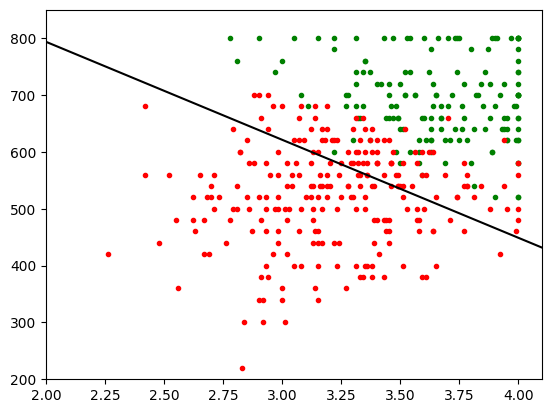

In [14]:
# Rename "rank" to "prestige" as "rank" is a reserved field
df.rename( columns={ "rank": "prestige"}, inplace=True )

# Original prestige of 1 is the best... but that makes it hard to use as a scalar...
# So flip the values... now 4 == best, 1 == worse
df['adjusted_prestige'] = 5 - df['prestige']

# This leaves: rank of 4 (best) == 100%... Rank of 1 (worse) == 87%
# agpa = (((df.adjusted_prestige+1000)/1004)*rgpa).sort_values()
agpa = (((df.adjusted_prestige+20)/24)*rgpa).sort_values()

df[ "Admitted_on_GPA_GRE_Rank" ] = ( ( ( rgre + agpa ) / 2) > .80 ).astype( float )

print( len( df[ df.Admitted_on_GPA_GRE_Rank == 1.0 ] ), len( df[ df.Admitted_on_GPA_GRE_Rank == 0.0 ] ) )

# r1  = smf.logit( "Admitted_on_GPA_GRE_Rank ~ gre + gpa", data=df ).fit( disp=0 ) # disp = 0 silences output
r1  = smf.logit( "Admitted_on_GPA_GRE_Rank ~ gre + gpa + prestige", data=df ).fit( disp=0 ) # disp = 0 silences output
print( r1.summary() )

admitted     = df[ df.Admitted_on_GPA_GRE_Rank == 1.0 ]
not_admitted = df[ df.Admitted_on_GPA_GRE_Rank == 0.0 ]
print("len:", len( not_admitted ), len( admitted ) )

plot( admitted.gpa, admitted.gre, 'g.' )
plot( not_admitted.gpa, not_admitted.gre, 'r.' )

xs = np.linspace( 2.0, 5.0, 1000 )
par = dict( r1.params )
plt.plot( xs, (1/par['gre'])*(logit(.5) - par['Intercept'] - par['gpa']*xs), color='Black' )
plt.xlim( [2.0, 4.1] )
plt.ylim( [200, 850] )